<a href="https://colab.research.google.com/github/szalontai/PUC_Rio_MVP_sprint_04/blob/develop/MVP_sprint_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Engenharia de Sistemas de Software Inteligentes - Profs. Marcos Kalinowski e Tatiana Escovedo
## MVP - Sprint 4:

O dataset escolhido é um que contém as medidas de peso, altura e idade como classe de entrada e como saida o tamanho do cliente (
XXS, S, M, L, XL, XXl e XXXL).


O datase pode ser localizado no endereço: https://www.kaggle.com/datasets/tourist55/clothessizeprediction                                      


Como trabalho em uma empresa que desenvolve software para a aréa de confecção, achei interessante analisar esse dataset e gostaria de usá-lo futuramente na empresa.

In [ ]:
# @title Carga das bibliotecas

# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import pickle
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



## Carga do Dataset

## Aqui eu faço a carga de todos os dataset apenas para demosntrar as quantidades usadas

In [ ]:
# @title Demostrativo da base Original

# Informa a URL de importação do dataset
url_original = 'https://raw.githubusercontent.com/szalontai/PUC_Rio_MVP_sprint_04/develop/Base_Teste_Original.csv'

# Lê o arquivo
dataset = pd.read_csv(url_original, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

# Carga
ds = dataset[["weight","age","height","size"]]

# Retirando os campos em branco
df = ds.dropna(how='any')

# Mostra as últimas linhas do dataset
df.tail()

,weight,age,height,size
147233,65,34.0,167.19,XL
147234,65,34.0,167.19,XL
147235,65,34.0,167.19,XL
147236,65,34.0,167.19,XL
147237,65,34.0,167.19,XL


In [ ]:
# @title Demostrativo da base Golden, com 20% da original.

# Informa a URL de importação do dataset
url_golden = 'https://raw.githubusercontent.com/szalontai/PUC_Rio_MVP_sprint_04/develop/Base_Teste_Golden.csv'

# Lê o arquivo
dataset = pd.read_csv(url_golden, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

# Carga
ds = dataset[["weight","age","height","size"]]

# Retirando os campos em branco
df = ds.dropna(how='any')

# Mostra as últimas linhas do dataset
df.tail()


,weight,age,height,size
29442,58,43.0,172.72,M
29443,65,30.0,170.18,M
29444,62,28.0,162.56,M
29445,48,30.0,165.10,XXS
29446,79,38.0,160.02,XXXL


In [ ]:
# @title Demostrativo da base teste, com 80% da original e carga

# Informa a URL de importação do dataset
url = 'https://raw.githubusercontent.com/szalontai/PUC_Rio_MVP_sprint_04/develop/Base_Teste_80.csv'

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

# Carga
ds = dataset[["weight","age","height","size"]]

# Retirando os campos em branco
df = ds.dropna(how='any')

# Mostra as últimas linhas do dataset
df.tail()

,weight,age,height,size
117786,65,34.0,167.19,XL
117787,65,34.0,167.19,XL
117788,65,34.0,167.19,XL
117789,65,34.0,167.19,XL
117790,65,34.0,167.19,XL


## Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = df.values
X = array[:,0:3]
y = array[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.590109 (0.004665)
CART: 0.607780 (0.004416)
NB: 0.567912 (0.003484)
LR: 0.565058 (0.005204)


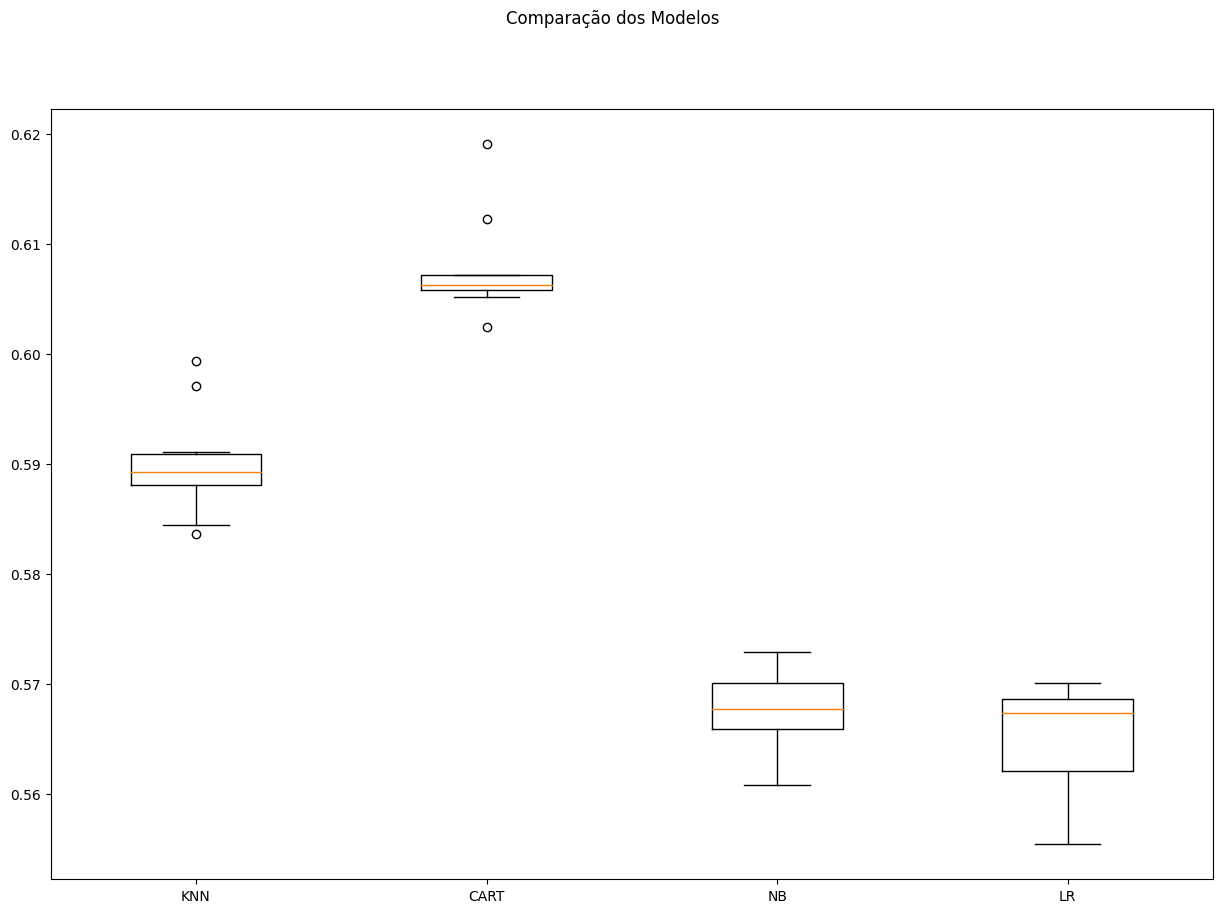

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.590 (0.005)
CART-orig: 0.608 (0.004)
NB-orig: 0.568 (0.003)
LR-orig: 0.565 (0.005)
KNN-padr: 0.591 (0.005)
CART-padr: 0.608 (0.005)
NB-padr: 0.568 (0.003)
LR-padr: 0.593 (0.005)
KNN-norm: 0.591 (0.003)
CART-norm: 0.608 (0.005)
NB-norm: 0.568 (0.003)
LR-norm: 0.583 (0.005)


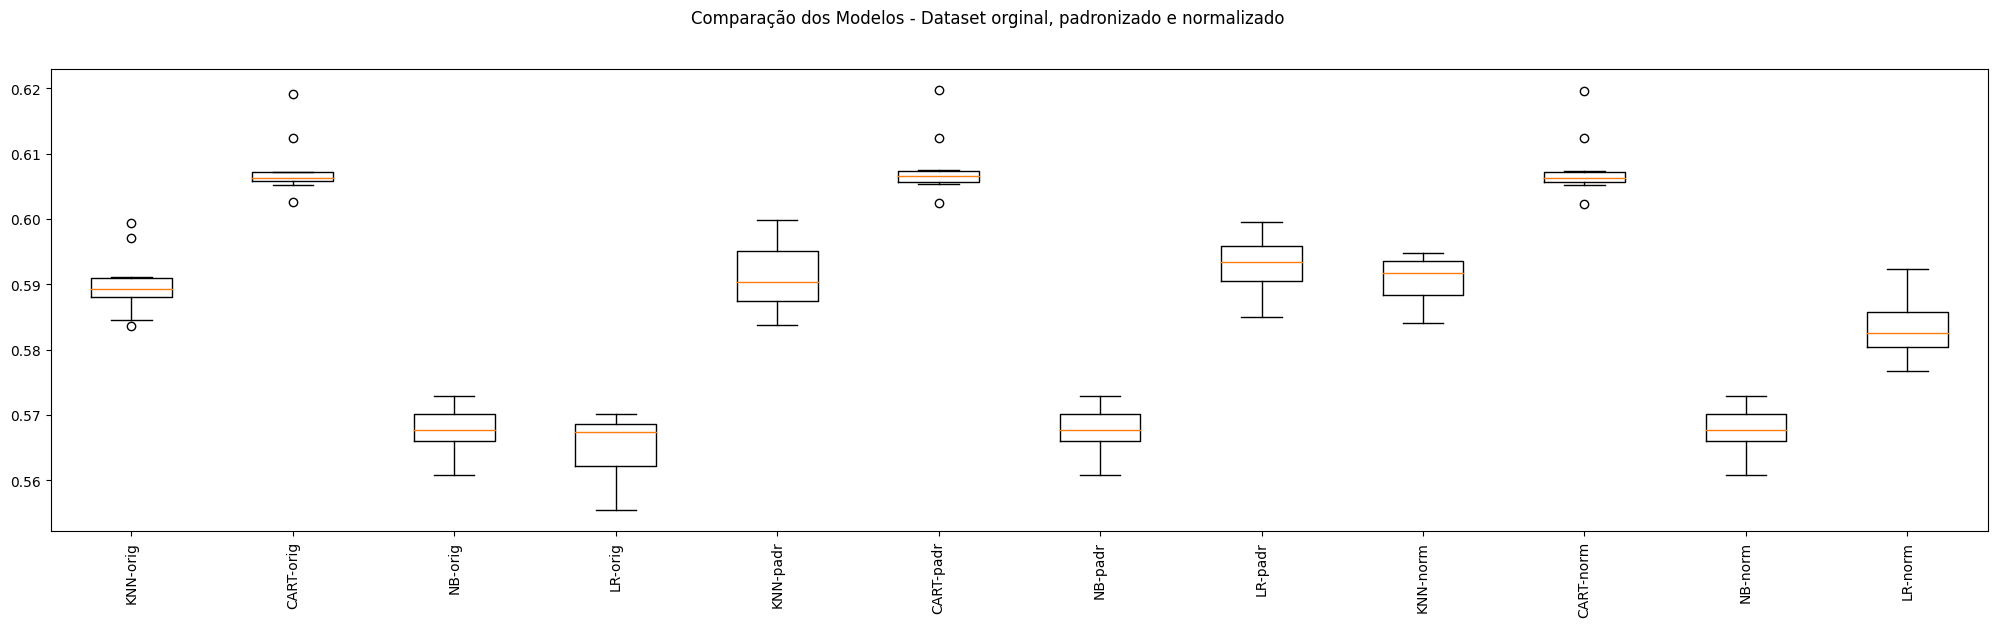

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
lr = ('LR', LogisticRegression())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('LR-orig', Pipeline([lr])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('LR-padr', Pipeline([standard_scaler, lr])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('LR-norm', Pipeline([min_max_scaler, lr])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

## Análise dos resultados

Apesar do CART apresentar o maior percentual entre os algoritmos, ele também apresenta alguns pontos fora.

O algorítimo KNN e LogisticRegression apresentaram os melhores resultados. Por isso escolhi os dois para fazer a otimização dos hiporparâmetros  

### Otimização dos hiperparâmetros

In [ ]:
# @title Tuning do LogisticRegression. Esse processo leva 1h10m

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
lr = ('LR', LogisticRegression())

standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Dataset original
pipelines.append(('LR-orig', Pipeline([lr])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, lr])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, lr])))

param_grid = {
    'LR__C': [1, 10, 100, 1000],
    'LR__random_state': [42],
    'LR__max_iter': [100, 200, 500, 1000]
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: LR-orig - Melhor: 0.589619 usando {'LR__C': 1, 'LR__max_iter': 1000, 'LR__random_state': 42}
Sem tratamento de missings: LR-padr - Melhor: 0.593092 usando {'LR__C': 1000, 'LR__max_iter': 100, 'LR__random_state': 42}
Sem tratamento de missings: LR-norm - Melhor: 0.593699 usando {'LR__C': 100, 'LR__max_iter': 100, 'LR__random_state': 42}


In [ ]:
# @title Tuning do KNN. Esse processo leva 21m

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.614948 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}
Sem tratamento de missings: knn-padr - Melhor: 0.613627 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 19}
Sem tratamento de missings: knn-norm - Melhor: 0.613830 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}


## Finalização do Modelo

In [ ]:
# @title Avaliação do modelo LogisticRegression com o conjunto de testes

# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler_LR = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler_LR.transform(X_train) # aplicação da padronização no conjunto de treino

# Escolha dos melhores parâmetros para LR e KNN
model_LR = LogisticRegression(C=1000, random_state=42, max_iter=100)
model_LR.fit(rescaledX, y_train)
rescaledTestX = scaler_LR.transform(X_test) # aplicação da padronização no conjunto de teste

# Estimativa da acurácia no conjunto de teste para o modelo LR
predictions_LR = model_LR.predict(rescaledTestX)
accuracy_LR = accuracy_score(y_test, predictions_LR)
report_LR = classification_report(y_test, predictions_LR)

# Impressão dos resultados
print("Predição LR:", predictions_LR)
print("Acurácia LR:", accuracy_LR)
print("\nRelatório de Classificação LR:")
print(report_LR)



Predição LR: ['M' 'L' 'XXXL' ... 'L' 'XL' 'XXS']
Acurácia LR: 0.5951772324471711

Relatório de Classificação LR:
              precision    recall  f1-score   support

           L       0.54      0.42      0.47      3455
           M       0.49      0.59      0.53      4542
           S       0.50      0.51      0.51      3343
          XL       0.55      0.41      0.47      3366
         XXL       0.72      1.00      0.84      3988
         XXS       0.58      0.39      0.46      1519
        XXXL       0.78      0.67      0.72      3259

    accuracy                           0.60     23472
   macro avg       0.59      0.57      0.57     23472
weighted avg       0.59      0.60      0.58     23472



In [ ]:
# @title Avaliação do modelo KNN com o conjunto de testes

# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler_KNN = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler_KNN.transform(X_train) # aplicação da padronização no conjunto de treino

# Escolha dos melhores parâmetros para LR e KNN
model_KNN = KNeighborsClassifier(metric='manhattan', n_neighbors=21)
model_KNN.fit(rescaledX, y_train)
rescaledTestX = scaler_KNN.transform(X_test) # aplicação da padronização no conjunto de teste


# Estimativa da acurácia no conjunto de teste para o modelo KNN
predictions_KNN = model_KNN.predict(rescaledTestX)
accuracy_KNN = accuracy_score(y_test, predictions_KNN)
report_KNN = classification_report(y_test, predictions_KNN)

# Impressão dos resultados
print("Predição KNN:", predictions_KNN)
print("Acurácia KNN:", accuracy_KNN)
print("\nRelatório de Classificação KNN:")
print(report_KNN)


Predição KNN: ['M' 'L' 'XXXL' ... 'L' 'XL' 'XXS']
Acurácia KNN: 0.6152436946148603

Relatório de Classificação KNN:
              precision    recall  f1-score   support

           L       0.51      0.43      0.47      3455
           M       0.47      0.58      0.52      4542
           S       0.48      0.50      0.49      3343
          XL       0.51      0.46      0.49      3366
         XXL       1.00      1.00      1.00      3988
         XXS       0.55      0.40      0.46      1519
        XXXL       0.75      0.76      0.75      3259

    accuracy                           0.62     23472
   macro avg       0.61      0.59      0.60     23472
weighted avg       0.62      0.62      0.61     23472



In [ ]:
# Preparação do modelo com TODO o dataset
scaler_LR = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler_LR.transform(X) # aplicação da padronização com TODO o dataset
model_LR.fit(rescaledX, y)

LogisticRegression(C=1000, random_state=42)

In [ ]:
# Preparação do modelo com TODO o dataset
scaler_KNN = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler_KNN.transform(X) # aplicação da padronização com TODO o dataset
model_KNN.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=21)

## Considerações finais


O algorítimo KNN apresentou um valor melhor em relação ao LogisticRegression.


KNN =  61,52%                                                                   
LogisticRegression = 59,57%

Por isso o modelo escolhido para dar continuidade no meu projeto do MVP, foi o KNN.

## Simulando a aplicação do modelo KNN em dados não vistos

In [ ]:
# Novos dados - não sabemos a classe!
data = {       ##   XL      XL      M       S       XXS     XXXL    L       XXL     M       S
        'weight':  [70,     74,     61,     45,     49,     76,     61,     65,     58,     52] ,
        'age':     [30,     31,     31,     29,     32,     30,     35.0,   34.0,   34.0,   27.0],
        'height':  [167.64, 167.64, 172.72, 154.94, 160.02, 167.64, 162.56, 160.02, 165.1,  160.02],
        }


atributos = ['weight', 'age', 'height']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:8].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX_KNN = scaler_KNN.transform(X_entrada)
print(rescaledEntradaX_KNN)

[[ 0.83645906 -0.60377095  0.42688488]
 [ 1.28562475 -0.46541227  0.42688488]
 [-0.17416375 -0.46541227  1.23387434]
 [-1.97082652 -0.74212962 -1.59058878]
 [-1.52166083 -0.3270536  -0.78359932]
 [ 1.5102076  -0.60377095  0.42688488]
 [-0.17416375  0.08802242 -0.38010458]
 [ 0.27500194 -0.05033625 -0.78359932]
 [-0.51103802 -0.05033625  0.02339015]
 [-1.18478656 -1.01884697 -0.78359932]]


In [ ]:
# Predição de classes dos dados de entrada
saidas = model_KNN.predict(rescaledEntradaX_KNN)
print(saidas)

['XXXL' 'XXXL' 'M' 'XXS' 'XXS' 'XXXL' 'L' 'L' 'M' 'S']


##Geração

In [ ]:
# @title Criação da classe Gerador

class Gerador:

    def gerador_pickle(self, modelo, nome):
        """ Gera o arquivo pickle baseado no modelo com o nome passado.
        """

        artifact_pkl_filename = nome+'.pkl'

        local_path = artifact_pkl_filename
        with open(local_path, 'wb') as model_file:
          pickle.dump(modelo, model_file)

    def gerador_joblib(self, modelo, nome):
        """ Gera o arquivo joblib baseado no modelo com o nome passado.
        """

        artifact_joblib_filename = nome+'.joblib'

        local_path = artifact_joblib_filename
        joblib.dump(modelo, local_path)




In [ ]:
# @title Geração dos modelo e do scaler via classe Gerador

# Foram gerados os dois modelos para validar no teste unitário

gerador = Gerador()

gerador.gerador_pickle(model_LR,"grade_lr")
gerador.gerador_pickle(scaler_LR,"scaler_lr")

gerador.gerador_pickle(model_KNN,"grade_knn")
gerador.gerador_pickle(scaler_KNN,"scaler_knn")
